<a href="https://colab.research.google.com/github/manthra16695/Code-360/blob/main/Manipal_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Manipal_Train.csv')

In [63]:
data.head()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,Country,STATEZONE,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,EM_OVERALL,AD_TIME,AD_TARRIFFPACKAGESEXPLAINATION,AD_STAFFATTITUDE,INR_ROOMCLEANLINESS,INR_ROOMPEACE,INR_ROOMEQUIPMENT,INR_ROOMAMBIENCE,FNB_FOODQUALITY,FNB_FOODDELIVERYTIME,FNB_DIETICIAN,FNB_STAFFATTITUDE,AE_ATTENDEECARE,AE_PATIENTSTATUSINFO,AE_ATTENDEEFOOD,DOC_TREATMENTEXPLAINATION,DOC_ATTITUDE,DOC_VISITS,DOC_TREATMENTEFFECTIVENESS,NS_CALLBELLRESPONSE,NS_NURSESATTITUDE,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,F,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,2,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/18/2014,7/21/2014,3,9,Promotor
1,2,35237,Single,13.0,F,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/11/2014,7/16/2014,5,10,Promotor
2,3,35234,Married,33.0,F,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,INDIA,SOUTH,3,2,2,4,4,4,4,3,3,4,3,3,3,3,2,3,3,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,6/17/2014,7/20/2014,33,7,Passive
3,4,35232,Married,51.0,F,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,INDIA,EAST,4,4,3,4,4,4,4,4,4,4,3,4,4,3,3,4,4,4,3,4,3,4,4,4,4,4,4,3,4,4,3,3,3,4,3,7/16/2014,7/22/2014,6,10,Promotor
4,5,35233,Married,31.0,F,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/13/2014,7/16/2014,3,10,Promotor


In [64]:
data.isnull().sum()

SN                                0
HospitalNo2                       0
MaritalStatus                     0
AgeYrs                            0
Sex                               0
BedCategory                       0
Department                        0
Estimatedcost                     0
InsPayorcategory                  0
State                             0
Country                           0
STATEZONE                         0
CE_ACCESSIBILITY                  0
CE_CSAT                           0
CE_VALUEFORMONEY                  0
EM_IMMEDIATEATTENTION             0
EM_NURSING                        0
EM_DOCTOR                         0
EM_OVERALL                        0
AD_TIME                           0
AD_TARRIFFPACKAGESEXPLAINATION    0
AD_STAFFATTITUDE                  0
INR_ROOMCLEANLINESS               0
INR_ROOMPEACE                     0
INR_ROOMEQUIPMENT                 0
INR_ROOMAMBIENCE                  0
FNB_FOODQUALITY                   0
FNB_FOODDELIVERYTIME        

In [65]:
data=data.drop(['SN','HospitalNo2'],axis=1)


In [66]:
catlist=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','State','Country','STATEZONE']
numlist=['AgeYrs','Estimatedcost','LengthofStay','CE_NPS']

for i in numlist:
  data[i]=data[i].astype('int')




In [67]:
##To Segregate Numeric and Categorical variables
ls=list(data.columns.values)

for i in ls:
  if i in numlist:
    ls.remove(i)

In [68]:
for i in ls:
  data[i]=data[i].astype('object')
# data['MaritalStatus']=data['MaritalStatus'].astype('category')

In [69]:
data['AdmissionDate']=pd.to_datetime(data['AdmissionDate'])
data['DischargeDate']=pd.to_datetime(data['DischargeDate'])

In [70]:
import numpy as np

for columns in ls:
  unique_vals=np.unique(data[columns])
  nr_value=len(unique_vals)
  if nr_value<20:
    print('The Number of values for feature {} is {} and the unique values are {}'.format(columns,nr_value, unique_vals))

The Number of values for feature MaritalStatus is 5 and the unique values are ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
The Number of values for feature Sex is 2 and the unique values are ['F' 'M']
The Number of values for feature BedCategory is 11 and the unique values are ['CCU' 'DAYCARE' 'GENERAL' 'GENERAL HD' 'ITU' 'Renal ICU' 'SEMISPECIAL'
 'SEMISPECIAL HD' 'SPECIAL' 'ULTRA DLX' 'ULTRA SPL']
The Number of values for feature Department is 7 and the unique values are ['CARDIOLOGY' 'GEN' 'GYNAEC' 'ORTHO' 'PEDIATRIC' 'RENAL' 'SPECIAL']
The Number of values for feature InsPayorcategory is 5 and the unique values are ['CORPORATE' 'EXEMPTION' 'INSURANCE' 'INTERNATIONAL' 'PATIENT']
The Number of values for feature STATEZONE is 7 and the unique values are ['CENTRAL' 'EAST' 'INTERNATIONAL' 'NORTH' 'SOUTH' 'Unknown' 'WEST']
The Number of values for feature CE_ACCESSIBILITY is 4 and the unique values are [1 2 3 4]
The Number of values for feature CE_CSAT is 4 and the unique values

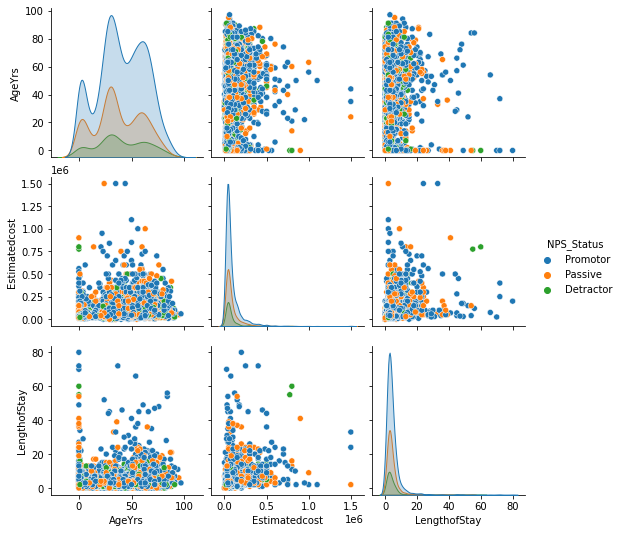

In [71]:
##Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

numericaldata=data[['AgeYrs','Estimatedcost','LengthofStay','NPS_Status']]
sns.pairplot(numericaldata,hue='NPS_Status')


In [72]:
data.dtypes

MaritalStatus                             object
AgeYrs                                     int64
Sex                                       object
BedCategory                               object
Department                                object
Estimatedcost                              int64
InsPayorcategory                          object
State                                     object
Country                                   object
STATEZONE                                 object
CE_ACCESSIBILITY                          object
CE_CSAT                                   object
CE_VALUEFORMONEY                          object
EM_IMMEDIATEATTENTION                     object
EM_NURSING                                object
EM_DOCTOR                                 object
EM_OVERALL                                object
AD_TIME                                   object
AD_TARRIFFPACKAGESEXPLAINATION            object
AD_STAFFATTITUDE                          object
INR_ROOMCLEANLINESS 

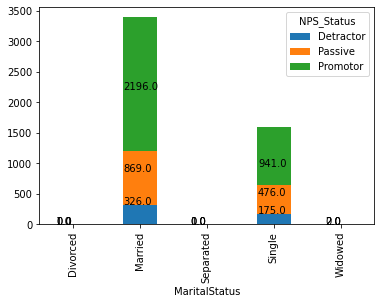

In [73]:
## Factor Vs Factor Marital Status and NPS_Status

crosstb=pd.crosstab(data['MaritalStatus'],data['NPS_Status'])

# crosstb=pd.crosstab(data['MaritalStatus'],data['NPS_Status']).apply(lambda r: r/r.sum(), axis=1)
ax=crosstb.plot(kind='bar',stacked=True,label=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [74]:
##Chisquared test to check for significance
from scipy import stats 

c,p,dof,expected=stats.chi2_contingency(crosstb)
p
##Yes there is significance between Marital Status and NPS_Status

0.0011860281607372464

In [75]:
crosstb ##64% of Married people seems to like the hospital and are Promotors compared to Singles whiere 59% are promotors

NPS_Status,Detractor,Passive,Promotor
MaritalStatus,,,
Divorced,1,0,0
Married,326,869,2196
Separated,0,0,1
Single,175,476,941
Widowed,0,2,2


In [76]:

count=0
a=[]
for i in ls:
  
  crosstb=pd.crosstab(data[i],data['NPS_Status'])
  c,p,dof,expected = stats.chi2_contingency(crosstb)

  if p <  0.05:
    count+=1
    print('{}Yes! This variable {} has significance with 95% conf with p-value as {} '.format(count,i,p))
  else:
    a.append(i)
##Seems like 45 variables out of 47 have significance at 90% confidence 
##Will perform EDA and Bi-Variate Analysis

1Yes! This variable MaritalStatus has significance with 95% conf with p-value as 0.0011860281607372464 
2Yes! This variable Sex has significance with 95% conf with p-value as 0.026911887890060066 
3Yes! This variable BedCategory has significance with 95% conf with p-value as 1.3572007100465888e-08 
4Yes! This variable Department has significance with 95% conf with p-value as 4.531334897059869e-07 
5Yes! This variable InsPayorcategory has significance with 95% conf with p-value as 4.076085776662428e-13 
6Yes! This variable State has significance with 95% conf with p-value as 8.179670103489967e-05 
7Yes! This variable Country has significance with 95% conf with p-value as 0.02084693233898609 
8Yes! This variable STATEZONE has significance with 95% conf with p-value as 6.226207775935155e-07 
9Yes! This variable CE_ACCESSIBILITY has significance with 95% conf with p-value as 8.531344167530348e-181 
10Yes! This variable CE_CSAT has significance with 95% conf with p-value as 0.0 
11Yes! This

In [77]:
count=0
b=[]
for i in numlist:
  
  Promotor=data[i][data['NPS_Status']=='Promotor']
  Passive=data[i][data['NPS_Status']=='Passive']
  Detractor=data[i][data['NPS_Status']=='Detractor']
  p_value=stats.f_oneway(Promotor,Passive,Detractor)
  print(p_value,i)
##Seems like all the int variables are significant based on ANOVA  

F_onewayResult(statistic=9.934319804713269, pvalue=4.944850823584424e-05) AgeYrs
F_onewayResult(statistic=3.623065193319743, pvalue=0.0267710272383185) Estimatedcost
F_onewayResult(statistic=3.9483229407524707, pvalue=0.019347353619054385) LengthofStay
F_onewayResult(statistic=10969.497611099176, pvalue=0.0) CE_NPS


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



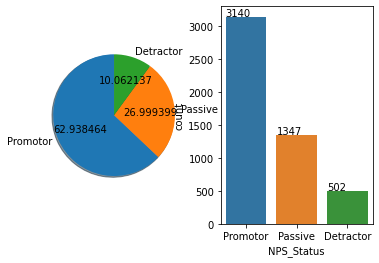

In [78]:
##Target Value Distribution

plt.figure()
plt.subplot(1,2,1)
plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)


plt.subplot(1,2,2)
cv=sns.countplot(data['NPS_Status'])
for p in cv.patches:
    cv.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# # plt.subplot(data['NPS_Status'])
# plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# sns.countplot(x=data['NPS_Status'],ax=1)

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
# axes[0].plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# axes[1].plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# fig.tight_layout()

# fig, ax =plt.subplots(1,2)
# sns.countplot(data['NPS_Status'], ax=ax[0])
# sns.barplot(data['NPS_Status'].count(), ax=ax[1])
# fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



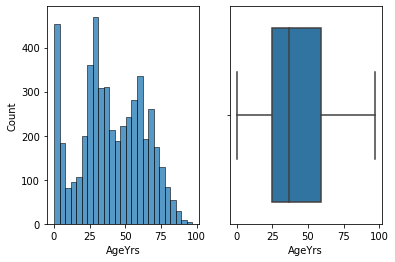

In [79]:
##Age Years and Target

plt.figure()
plt.subplot(1,2,1)
sns.histplot(data['AgeYrs'])

# plt.subplot(1,2,2)
# sns.distplot(data['AgeYrs'])

plt.subplot(1,2,2)
sns.boxplot(data['AgeYrs'])

In [80]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=data['AgeYrs']))

loss_90th=data['AgeYrs'].quantile(0.90)
loss_10th=data['AgeYrs'].quantile(0.10)

fig.add_shape(
        go.layout.Shape(type='line', xref='x',
                        x0=loss_90th, y0=0,x1=loss_90th,y1=300, line=dict(
        color="black",
        width=1,
    ))
)

fig.add_shape(
        go.layout.Shape(type='line', xref='x',
                        x0=loss_10th, y0=0,x1=loss_10th,y1=300, line=dict(
        color="black",
        width=1,
    ))
)
##80 % of patients are from Age 5 to 70
##Most likely age range is between 20-40

,AgeYrs
NPS_Status,
Detractor,40.209163
Passive,37.334076
Promotor,40.594268


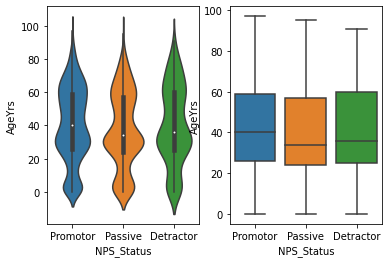

In [81]:
##Bi-Variate Age and Target
plt.figure()
plt.subplot(1,2,1)
sns.violinplot(x=data['NPS_Status'],y=data['AgeYrs'])
##There is a slight difference between Passive and the other groups whereas Promtors and Detractor dont have significance

# data['AgeYrs'][data['NPS_Status']=='Detractor'].mean()
plt.subplot(1,2,2)
sns.boxplot(x=data['NPS_Status'],y=data['AgeYrs'])
data.groupby('NPS_Status')[['AgeYrs']].mean()


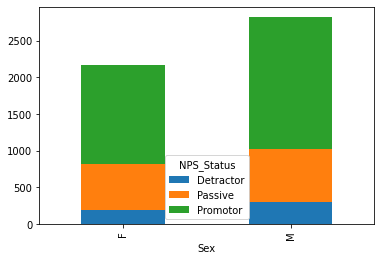

In [82]:
##Relation between SEX and Target

crstb=pd.crosstab(data['Sex'],data['NPS_Status'])
crstb.plot(kind='bar',stacked=True)

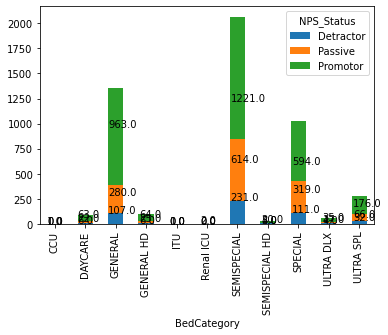

In [83]:
##EDA for Bed Category and Departments
crstb=pd.crosstab(data['BedCategory'],data['NPS_Status'])
ax=crstb.plot(kind='bar',stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

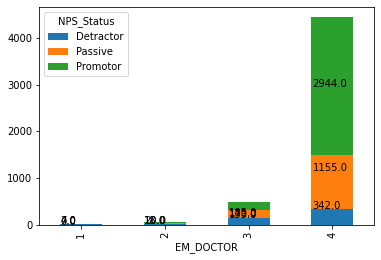

In [84]:
##EDA for Departments
crstb=pd.crosstab(data['EM_DOCTOR'],data['NPS_Status'])
ax=crstb.plot(kind='bar',stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

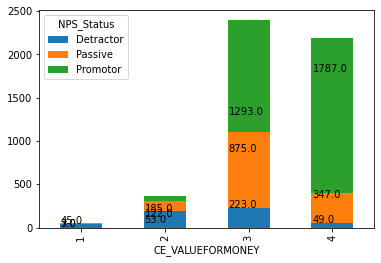

In [85]:
##EDA for Departments
crstb=pd.crosstab(data['CE_VALUEFORMONEY'],data['NPS_Status'])
ax=crstb.plot(kind='bar',stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

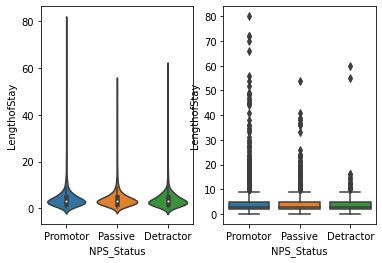

In [86]:
##Bi-Variate LengthofStay and Target
plt.figure()
plt.subplot(1,2,1)
sns.violinplot(x=data['NPS_Status'],y=data['LengthofStay'])
##There is a slight difference between Passive and the other groups whereas Promtors and Detractor dont have significance
plt.subplot(1,2,2)
sns.boxplot(x=data['NPS_Status'],y=data['LengthofStay'])

# data['AgeYrs'][data['NPS_Status']=='Detractor'].mean()
# data.groupby('NPS_Status')[['LengthofStay']].mean()


In [87]:

data['AgeYrs'].describe()

count    4989.000000
mean       39.675286
std        22.673947
min         0.000000
25%        25.000000
50%        37.000000
75%        59.000000
max        97.000000
Name: AgeYrs, dtype: float64

In [88]:
##Normalizing the Integer variables

##We dont need Normalization for Bagging and Boosting and DT and RF whereas its needed for KNN, NN, Gradient descent usually
##G
##Age is non uniform hence performing Standardization to make it a normal distribution

from sklearn.preprocessing import MinMaxScaler


stdscaler=MinMaxScaler()
data['AgeYrs']=stdscaler.fit_transform(data[['AgeYrs']])

In [89]:
#One hot encoding for categorical variable for variables with levels <=10
# data=pd.get_dummies(data,columns=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','STATEZONE'])
strcatlist=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','State','Country','STATEZONE']

for i in strcatlist:
  print('No of unique values in {} are {}'.format(i,len(np.unique(data[i]))))
  if len(np.unique(data[i]))<=10:
    data=pd.get_dummies(data,columns=[i])


No of unique values in MaritalStatus are 5
No of unique values in Sex are 2
No of unique values in BedCategory are 11
No of unique values in Department are 7
No of unique values in InsPayorcategory are 5
No of unique values in State are 57
No of unique values in Country are 29
No of unique values in STATEZONE are 7


In [90]:
##One hot Encoding for Features with more than 10 levels, We just take top 10 categories
##Bed Category, State, Country
data.BedCategory.value_counts().sort_values(ascending= False).head(20)

top_10_bed=[x for x in data.BedCategory.value_counts().sort_values(ascending= False).head(10).index ]
top_10_bed

['SEMISPECIAL',
 'GENERAL',
 'SPECIAL',
 'ULTRA SPL',
 'GENERAL HD',
 'DAYCARE',
 'ULTRA DLX',
 'SEMISPECIAL HD',
 'Renal ICU',
 'CCU']

In [91]:
for label in top_10_bed:
  data[label]=np.where(data['BedCategory']==label,1,0)

In [92]:
##Function for One Hot Encoding
def one_hot_encode(df,variable,top_10):
  for label in top_10:
    data[label]=np.where(data[variable]==label,1,0)


In [93]:
##one hot Encoding for State
top_10=[x for x in data.State.value_counts().sort_values(ascending=False).head(10).index]
one_hot_encode(data,'State',top_10)

In [94]:
##one hot Encoding for Country
top_10=[x for x in data.Country.value_counts().sort_values(ascending=False).head(10).index]
one_hot_encode(data,'Country',top_10)

In [95]:
##Dropping original variables after creating dummy variables
data=data.drop(labels=['State','Country','BedCategory'],axis=1)

In [96]:
##Checkging for Multicollinearity
##I can also use Corr Plot to see collinearity
##For Multicollinearity if small set of features -> VIF else if more no of features -> Ridge or Lasso
##VIF starts from 1 -> Infinity
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Independent int variables
X=data[['AgeYrs','Estimatedcost','LengthofStay']]

##VIF Dataframe
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

##Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

##Seems like no strong Multicollinearity

X.corr()

         feature       VIF
0         AgeYrs  1.766420
1  Estimatedcost  1.791102
2   LengthofStay  1.753535


,AgeYrs,Estimatedcost,LengthofStay
AgeYrs,1.000000,0.114673,0.043928
Estimatedcost,0.114673,1.000000,0.302158
LengthofStay,0.043928,0.302158,1.000000


In [100]:
##To Segregate Numeric and Categorical variables
ls=list(data.columns.values)

for i in ls:
  if i in numlist:
    ls.remove(i)

In [107]:
for i in ls:
  data[i]=data[i].astype('object')
data['Estimatedcost']=data['Estimatedcost'].astype('int')
data['LengthofStay']=data['LengthofStay'].astype('int')

In [116]:
Y=data['NPS_Status']
data=data.drop('NPS_Status',axis=1)
X=data.iloc[:,:]

In [135]:
X=X.drop(['AdmissionDate','DischargeDate','CE_NPS'],axis=1)


In [147]:
##Feature Selection Methods

##1 - > Univariate selection
## For Med - Small Datasets use Backward Elimintaion, Forward selection, Recursive feature Extraction 
##Embedded Methods - These methods randomly select all possible combinations of variables and select the best possible combination

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_feature=SelectKBest(score_func=chi2)
ranks=ordered_rank_feature.fit(X,Y)



In [148]:
scores=pd.DataFrame(ranks.scores_,columns=['Scores'])
cols=pd.DataFrame(X.columns)

In [149]:
feature_rank=pd.concat([scores,cols],axis=1)
feature_rank.columns=['Scores','Columns']


In [151]:
feature_rank.nlargest(50,'Scores')##Top 10 important variables

,Scores,Columns
1,905601.694937,Estimatedcost
4,146.962734,CE_VALUEFORMONEY
3,103.683774,CE_CSAT
34,98.200681,DP_DISCHARGETIME
22,98.124673,AE_ATTENDEEFOOD
36,83.706629,DP_DISCHARGEPROCESS
16,79.178343,FNB_FOODQUALITY
17,77.517693,FNB_FOODDELIVERYTIME
10,75.454666,AD_TARRIFFPACKAGESEXPLAINATION
35,70.078617,DP_DISCHARGEQUERIES


In [153]:
##feature Importance using Ensemble Extra tree CLassifier

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)

[4.75869993e-02 4.25868730e-02 3.04595481e-02 4.77322301e-02
 4.75434161e-02 1.19534436e-02 9.92410062e-03 9.05630085e-03
 1.21016563e-02 1.80005822e-02 2.04929253e-02 1.58775530e-02
 1.80790989e-02 1.65783350e-02 1.44658584e-02 1.84900007e-02
 2.30596411e-02 1.88975717e-02 1.62625048e-02 1.49934514e-02
 1.50628608e-02 1.68997772e-02 2.53476273e-02 1.06086242e-02
 1.13962114e-02 1.74138971e-02 1.25465557e-02 1.10861032e-02
 9.35785915e-03 1.12347146e-02 9.56466163e-03 9.73267974e-03
 1.23378139e-02 1.22795513e-02 2.19891132e-02 1.83914910e-02
 1.87478060e-02 4.12560803e-02 3.83194946e-05 1.09855633e-02
 1.05828723e-05 1.10215868e-02 1.54681275e-04 1.50932004e-02
 1.48347253e-02 6.60775657e-03 1.60176632e-02 6.75237738e-03
 7.28770966e-03 8.39848256e-03 4.45826782e-03 1.11395325e-02
 7.98282702e-03 7.06234735e-03 1.51480228e-02 1.58306162e-03
 1.56915859e-02 3.10223654e-04 3.38218443e-03 1.14593252e-03
 1.05801892e-03 5.22091447e-03 1.45460120e-03 8.02002109e-04
 1.48378303e-02 1.532419

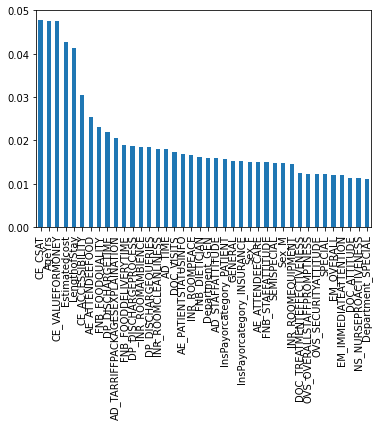

In [158]:
featr_imp_score=pd.Series(model.feature_importances_,index=X.columns)
featr_imp_score.nlargest(0).plot(kind='bar')


In [41]:

##Dummies for Categorical Variables -- Done
##VIF and Step Wise Regression -- Done
##Normalizing the integer variables -- Done
##Sampling if sensitivity, specificity is less than desired
##Modelling
data.corr()

,AgeYrs,Estimatedcost,LengthofStay,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Separated,MaritalStatus_Single,MaritalStatus_Widowed,Sex_F,Sex_M,Department_CARDIOLOGY,Department_GEN,Department_GYNAEC,Department_ORTHO,Department_PEDIATRIC,Department_RENAL,Department_SPECIAL,InsPayorcategory_CORPORATE,InsPayorcategory_EXEMPTION,InsPayorcategory_INSURANCE,InsPayorcategory_INTERNATIONAL,InsPayorcategory_PATIENT,STATEZONE_CENTRAL,STATEZONE_EAST,STATEZONE_INTERNATIONAL,STATEZONE_NORTH,STATEZONE_SOUTH,STATEZONE_Unknown,STATEZONE_WEST,SEMISPECIAL,GENERAL,SPECIAL,ULTRA SPL,GENERAL HD,DAYCARE,ULTRA DLX,SEMISPECIAL HD,Renal ICU,CCU,Karnataka,West Bengal,Andhra Pradesh,Tamil Nadu,Unknown,Kerala,Tanzania,Orissa,Assam,Jharkhand,INDIA,UNITED REPUBLIC OF TANZANIA,MALDIVES,IRAQ,NIGERIA,OMAN,MAURITIUS,BANGLADESH,Africa,YEMEN
AgeYrs,1.000000,0.114673,0.043928,0.010820,0.728516,-0.021656,-0.731594,0.044136,-0.046345,0.046345,0.167548,0.086461,-0.065587,0.070448,-0.591842,0.109601,0.225370,0.100967,0.091240,-0.099268,0.000139,-0.015063,0.002816,0.036421,0.009518,-0.001580,-0.022455,-0.005087,-0.035064,-0.018615,0.017360,0.006950,-0.008771,0.054328,-0.083142,0.006645,0.058663,-0.005455,-0.024778,-0.034061,0.024476,0.019590,0.020680,-0.005087,-0.006859,0.028291,0.014412,0.026004,-0.002002,-0.009035,0.028291,-0.001335,-0.030590,0.012901,0.011443,-0.026861,0.010693,-0.010723,0.010810
Estimatedcost,0.114673,1.000000,0.302158,-0.004612,0.109986,-0.007387,-0.109803,0.001184,0.030962,-0.030962,0.080726,-0.186868,0.009098,0.261022,-0.120848,0.015753,0.097273,-0.034863,0.153401,-0.071978,0.238010,-0.068096,0.020364,-0.016488,0.236844,0.005715,-0.120305,0.044440,0.067063,-0.029484,-0.084542,0.081085,0.053704,0.071903,-0.066153,0.034380,0.032305,-0.009467,-0.009469,-0.109000,-0.024599,-0.005853,0.024707,0.044440,0.002682,0.112045,0.008925,0.021480,-0.003188,-0.257106,0.112045,0.034067,0.189636,0.130122,0.073183,0.052079,0.015605,0.066045,0.003309
LengthofStay,0.043928,0.302158,1.000000,-0.006528,0.021208,-0.006528,-0.020973,0.002314,-0.022219,0.022219,0.014346,-0.041486,-0.062574,-0.020003,0.044824,-0.041176,0.084078,0.069726,0.049514,-0.073034,0.038140,-0.007193,-0.006511,-0.060062,0.037362,0.007937,0.016352,0.024809,0.029390,-0.005097,-0.044946,-0.019511,-0.029709,0.262247,-0.069641,-0.002562,0.142189,-0.007257,-0.003734,-0.002119,-0.057614,0.027401,0.017713,0.024809,-0.013099,0.028536,-0.004040,-0.013093,-0.017056,-0.038522,0.028536,-0.007395,0.049209,0.013027,-0.012142,0.005968,0.001741,0.035404,-0.008082
MaritalStatus_Divorced,0.010820,-0.004612,-0.006528,1.000000,-0.020626,-0.000200,-0.009693,-0.000401,0.016158,-0.016158,-0.004117,0.015692,-0.003762,-0.004112,-0.005349,-0.002946,-0.006252,-0.004083,-0.004953,-0.010809,0.110914,-0.012297,-0.000635,-0.004321,0.099512,-0.001083,-0.035734,-0.001713,-0.001305,-0.011904,0.023247,-0.007196,-0.003413,-0.001973,-0.001930,-0.001509,-0.001083,-0.000284,-0.000200,-0.027608,-0.003732,-0.002731,-0.002270,-0.001713,-0.001536,-0.001044,-0.000984,-0.000875,-0.000803,-0.094740,-0.001044,-0.000635,-0.000635,-0.000602,-0.000602,-0.000531,-0.000531,0.447034,-0.000347
MaritalStatus_Married,0.728516,0.109986,0.021208,-0.020626,1.000000,-0.020626,-0.997239,-0.041264,0.092820,-0.092820,0.093885,0.072692,0.144322,0.026111,-0.543775,0.076047,0.163607,0.068864,0.128515,-0.053084,-0.008125,-0.064165,-0.007655,0.041748,0.002187,-0.020972,-0.012351,-0.017787,-0.040187,-0.021150,0.015869,-0.002136,0.003325,0.035923,-0.047679,0.020132,0.035538,-0.007712,0.009720,-0.018827,0.046682,0.003082,0.024842,-0.017787,-0.009708,0.015506,-0.001941,0.021521,-0.021845,0.000255,0.015506,0.011555,-0.026864,0.019060,0.029183,-0.020174,0.002779,-0.018986,0.016839
MaritalStatus_Separated,-0.021656,-0.007387,-0.006528,-0.000200,-0.020626,1.000000,-0.009693,-0.000401,-0.012408,0.012408,-0.004117,-0.012776,-0.003762,-0.004112,0.037483,-0.002946,-0.006252,-0.004083,-0.004953,-0.010809,-0.001808,0.016304,-0.000635,-0.004321,-0.002015,-0.001083,